In [1]:
%load_ext autoreload

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


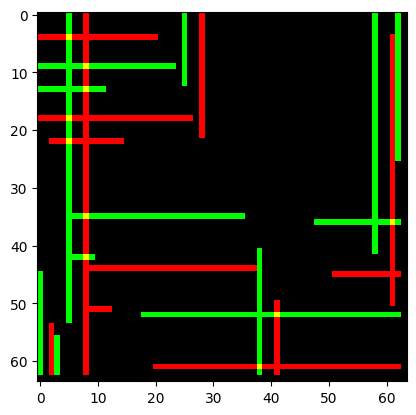

In [25]:
import os
os.chdir('C:/Users/clack/Projects/nwm')

import matplotlib.pyplot as plt
import torch
from datasets import Nav2dDataset
from misc import transform


train_dataset = Nav2dDataset(
  size=1000,
  resolution=64,
  context_size=1,
  goal_count=4,
  max_step_distance=0.05,
  max_angular_drift=torch.pi,
  transform=transform
)
sample = train_dataset[0]
before = sample[0][0].permute(1, 2, 0)
after = sample[1][0].permute(1, 2, 0)
plt.imshow(torch.stack((before[:, :, 0], after[:, :, 1], torch.zeros_like(before[:, :, 0])), dim=2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


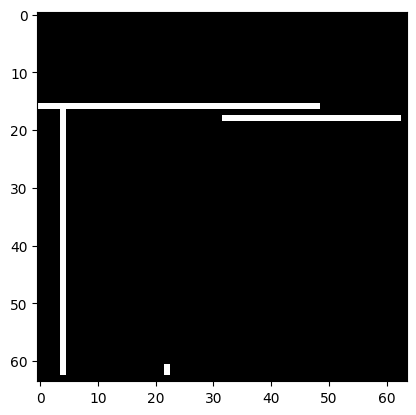

In [14]:

plt.imshow(sample[1][0].permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999966].


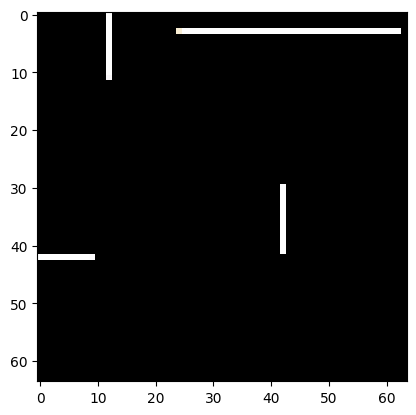

In [4]:
from experiment.vae import make_vae


tokenizer = make_vae().to('cuda')
tokenizer.load_state_dict(torch.load('checkpoints/vae/check57.pt'))
recons = tokenizer.forward_recons(train_dataset[0][0].cuda())
plt.imshow(recons[0].permute(1, 2, 0).detach().cpu().numpy())